In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/mumbai-monthly-rains.csv')

In [ ]:
data.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [ ]:
data.shape

(121, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [ ]:
data.isnull().sum()

Year     0
Jan      0
Feb      0
Mar      0
April    0
May      0
June     0
July     0
Aug      0
Sept     0
Oct      0
Nov      0
Dec      0
Total    0
dtype: int64

In [ ]:
data.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'Total'],
      dtype='object')

In [ ]:
# Melt the dataframe
df1 = pd.melt(data, id_vars=['Year'], value_vars=['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec'],var_name='Month',  value_name='Rainfall', ignore_index=True)

# Display the first few rows of the melted dataframe
print(df1.head())
df1.head()



   Year Month   Rainfall
0  1901   Jan  13.116602
1  1902   Jan   0.000000
2  1903   Jan   0.000000
3  1904   Jan   0.000000
4  1905   Jan   0.662561


,Year,Month,Rainfall
0,1901,Jan,13.116602
1,1902,Jan,0.000000
2,1903,Jan,0.000000
3,1904,Jan,0.000000
4,1905,Jan,0.662561


In [ ]:
df1['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [ ]:
df1['Month_new'] = ''
for i in range(len(df1)):
  if df1['Month'][i] == 'Jan':
    df1['Month_new'][i] = 1
  elif df1['Month'][i] == 'Feb':
    df1['Month_new'][i] = 2
  elif df1['Month'][i] == 'Mar':
    df1['Month_new'][i] = 3
  elif df1['Month'][i] == 'April':
    df1['Month_new'][i] = 4
  elif df1['Month'][i] == 'May':
    df1['Month_new'][i] = 5
  elif df1['Month'][i] == 'June':
    df1['Month_new'][i] = 6
  elif df1['Month'][i] == 'July':
    df1['Month_new'][i] = 7
  elif df1['Month'][i] == 'Aug':
    df1['Month_new'][i] = 8
  elif df1['Month'][i] == 'Sept':
    df1['Month_new'][i] = 9
  elif df1['Month'][i] == 'Oct':
    df1['Month_new'][i] = 10
  elif df1['Month'][i] == 'Nov':
    df1['Month_new'][i] = 11
  elif df1['Month'][i] == 'Dec':
    df1['Month_new'][i] = 12

In [ ]:
# Convert 'Year' column to string type
df1['Year'] = df1['Year'].astype(str)

# Create the 'date' column
df1['date'] = df1['Year'] + df1['Month']

In [ ]:
df1

,Year,Month,Rainfall,Month_new,date
0,1901,Jan,13.116602,1,1901Jan
1,1902,Jan,0.000000,1,1902Jan
2,1903,Jan,0.000000,1,1903Jan
3,1904,Jan,0.000000,1,1904Jan
4,1905,Jan,0.662561,1,1905Jan
...,...,...,...,...,...
1447,2017,Dec,79.685446,12,2017Dec
1448,2018,Dec,0.000000,12,2018Dec
1449,2019,Dec,1.172425,12,2019Dec
1450,2020,Dec,16.787305,12,2020Dec


In [ ]:
# Convert 'Year' column to string type
df1['Year'] = df1['Year'].astype(str)

# Create the 'date' column in 'YYYY-MM' format
df1['date'] = df1['Year'] + '-' + df1['Month_new'].astype(str).str.zfill(2) # Pad month with zero if single digit

# Convert 'date' column to datetime objects
df1['date']= pd.to_datetime(df1['date'], format='%Y-%m')

df1 = df1.sort_values(by='date', ascending=True)





In [ ]:
df1

,Year,Month,Rainfall,Month_new,date
0,1901,Jan,13.116602,1,1901-01-01
121,1901,Feb,0.000000,2,1901-02-01
242,1901,Mar,0.000000,3,1901-03-01
363,1901,April,3.949669,4,1901-04-01
484,1901,May,17.139791,5,1901-05-01
...,...,...,...,...,...
967,2021,Aug,323.199896,8,2021-08-01
1088,2021,Sept,601.247517,9,2021-09-01
1209,2021,Oct,36.040432,10,2021-10-01
1330,2021,Nov,25.156942,11,2021-11-01


In [ ]:
df =df1.drop(['Year','Month','Month_new'], axis=1)


In [ ]:
df

,Rainfall,date
0,13.116602,1901-01-01
121,0.000000,1901-02-01
242,0.000000,1901-03-01
363,3.949669,1901-04-01
484,17.139791,1901-05-01
...,...,...
967,323.199896,2021-08-01
1088,601.247517,2021-09-01
1209,36.040432,2021-10-01
1330,25.156942,2021-11-01


In [ ]:
df = df.set_index('date') # Set 'date' column as index



In [ ]:
df

,Rainfall
date,
1901-01-01,13.116602
1901-02-01,0.000000
1901-03-01,0.000000
1901-04-01,3.949669
1901-05-01,17.139791
...,...
2021-08-01,323.199896
2021-09-01,601.247517
2021-10-01,36.040432


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1452 entries, 1901-01-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rainfall  1452 non-null   float64
dtypes: float64(1)
memory usage: 22.7 KB


In [ ]:
df.isnull().sum()

Rainfall    0
dtype: int64

In [ ]:
df.shape

(1452, 1)

In [ ]:
df.columns

Index(['Rainfall'], dtype='object')

In [ ]:
df.describe()

,Rainfall
count,1452.000000
mean,180.676309
std,293.125556
min,0.000000
25%,0.000000
50%,3.013463
75%,285.018462
max,1358.833554


In [ ]:
df

,Rainfall
date,
1901-01-01,13.116602
1901-02-01,0.000000
1901-03-01,0.000000
1901-04-01,3.949669
1901-05-01,17.139791
...,...
2021-08-01,323.199896
2021-09-01,601.247517
2021-10-01,36.040432


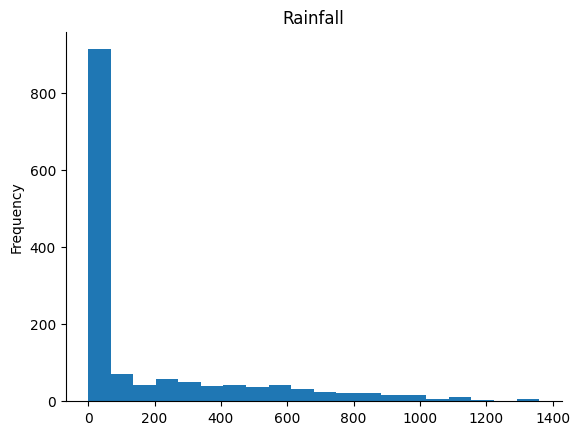

In [ ]:
df['Rainfall'].plot(kind='hist', bins=20, title='Rainfall')
plt.gca().spines[['top', 'right',]].set_visible(False)

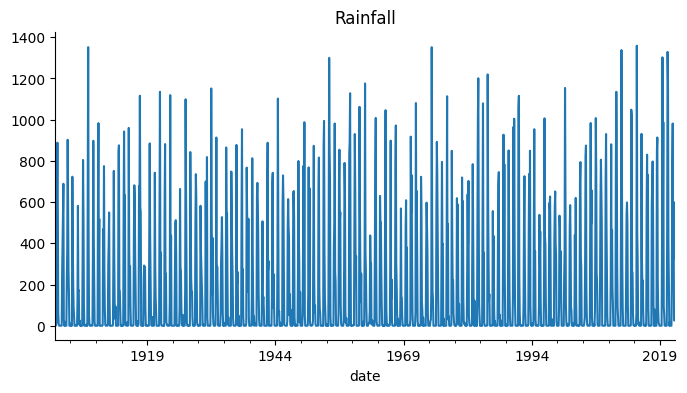

In [ ]:
df['Rainfall'].plot(kind='line', figsize=(8, 4), title='Rainfall')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
  result = adfuller(series)
  print('ADF Statistics:', result[0])
  print('p-value:',result[1])
  if result[1] <= 0.05:
    print('Data is Stationary')
  else :
    print('Data is not stationary')

In [ ]:
adf_test(df['Rainfall'])

ADF Statistics: -5.592175157465863
p-value: 1.3214840668523078e-06
Data is Stationary


<Axes: xlabel='date'>

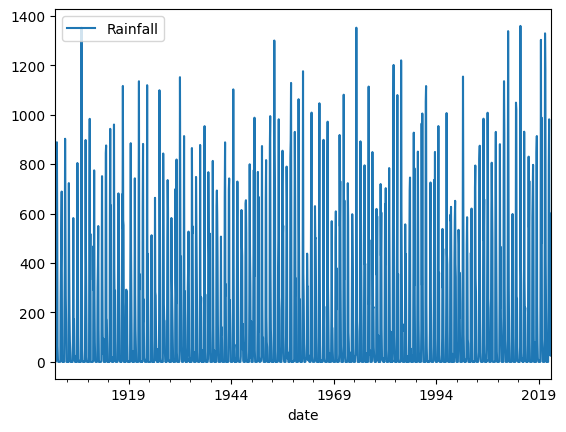

In [ ]:
df.plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

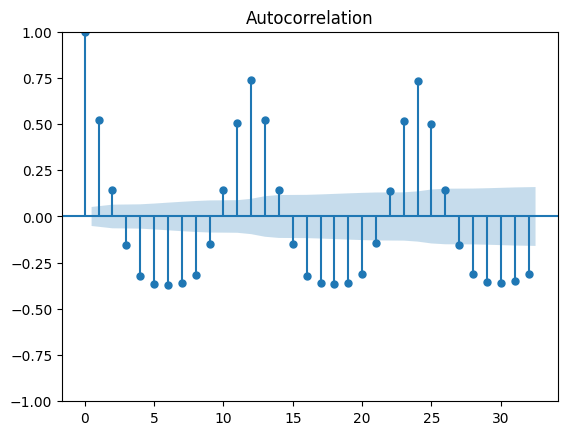

In [ ]:
acf = plot_acf(df['Rainfall'].dropna()) # this gives us q

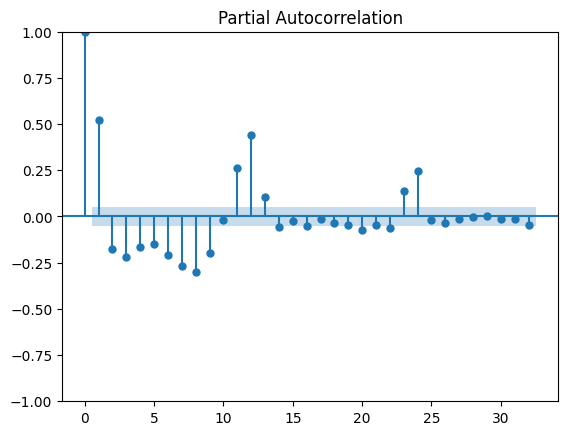

In [ ]:
pacf = plot_pacf(df['Rainfall'].dropna()) # this gives us p

<Axes: xlabel='date'>

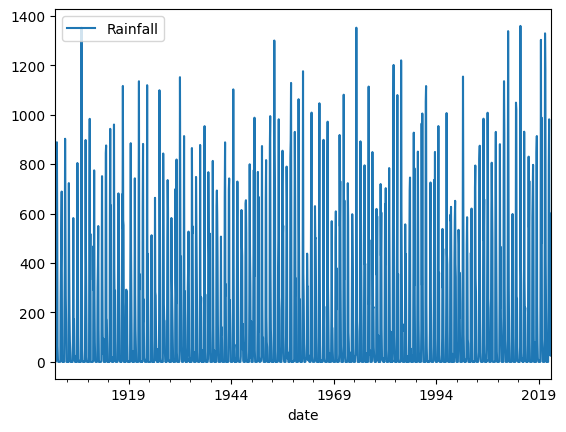

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from datetime import datetime,timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [ ]:
train_d =  df[:train_dataset_end]
test_d = df[train_dataset_end + timedelta(days = 1):test_dataset_end]

In [ ]:
pred_start_date = test_d.index[0]
pred_end_date = test_d.index[-1]

In [ ]:
model_arima = sms.tsa.ARIMA(train_d['Rainfall'],order=(3,0,3))

In [ ]:
model = model_arima.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Rainfall   No. Observations:                  660
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -4419.029
Date:                Sun, 21 Jul 2024   AIC                           8854.058
Time:                        07:05:10   BIC                           8889.996
Sample:                    01-01-1901   HQIC                          8867.987
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.4052     11.570     14.641      0.000     146.728     192.082
ar.L1          0.7323      0.009     82.366      0.000       0.715       0.750
ar.L2          0.7314      0.015     47.370      0.000       0.701       0.762
ar.L3         -0.9996      0.009   -112.475      0.000      -1.017      -0.982
ma.L1         -0.7355      0.100     -7.363      0.000      -0.931      -0.540
ma.L2         -0.7375      0.124     -5.964      0.000      -0.980      -0.495
ma.L3          0.9980      0.052     19.234      0.000       0.896       1.100
sigma2      4.083e+04      1e-05   4.07e+09      0.000    4.08e+04    4.08e+04
===================================================================================
Ljung-Box (L1) (Q):                  13.44   Jarque-Bera (JB):               287.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             1.15
Prob(H) (two-sided):                  0.80   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.67e+28. Standard errors may be unstable.
"""

In [ ]:
pred = model.predict(start = pred_start_date,end = pred_end_date)

In [ ]:
test_d['Predictions']=pred

<Axes: xlabel='date'>

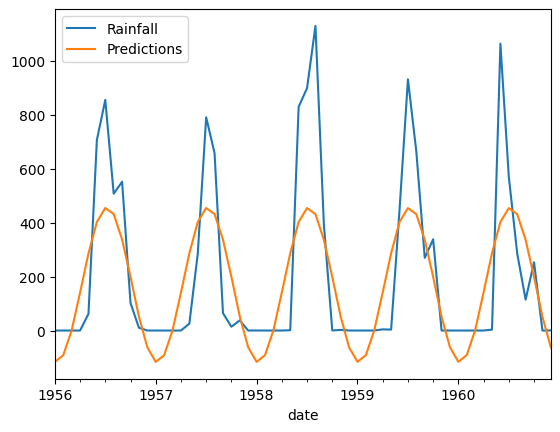

In [ ]:
test_d[['Rainfall','Predictions']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_sarimax = SARIMAX(train_d['Rainfall'],order=(3,0,3),seasonal_order=(3,0,3,12))

<Axes: xlabel='date'>

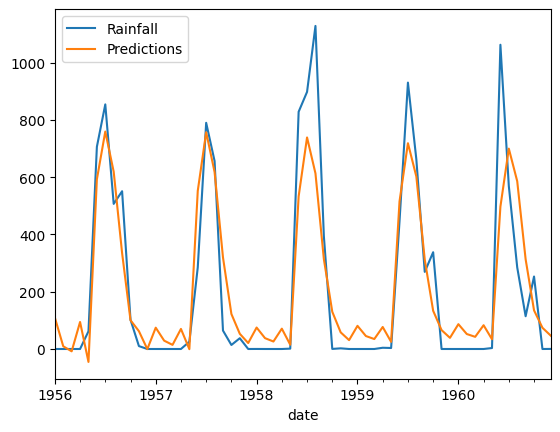

In [ ]:
results = model_sarimax.fit()
results.summary()
predmax = results.predict(start = pred_start_date,end = pred_end_date)
test_d['Predictions']=predmax
test_d[['Rainfall','Predictions']].plot()